# **Submitted by:**
**- Adir Hilvert 039070842**<br>
**- Ogen Drukerman 307574905**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#import copy library to handle seperate copies of weight matrices
import copy

print(tf.__version__)

2.7.0


In [2]:
import warnings
warnings.filterwarnings("ignore")

# **Question 1:**

**Import fashion mnist dataset**

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(fash_train_images, fash_train_labels), (fash_test_images, fash_test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
fash_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Exploring the data**

In [5]:
fash_train_images.shape

(60000, 28, 28)

In [6]:
len(fash_train_labels)

60000

In [7]:
fash_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
len(fash_test_labels)

10000

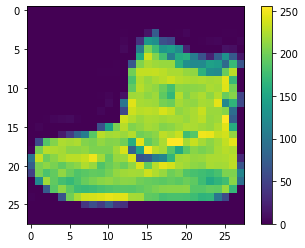

In [9]:
plt.figure()
plt.imshow(fash_train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Preprocessing**

In [10]:
# Scaling from 0-255 to 0-1

fash_train_images = fash_train_images / 255.0

fash_test_images = fash_test_images / 255.0

**Displaying first 25 images from the dataset**

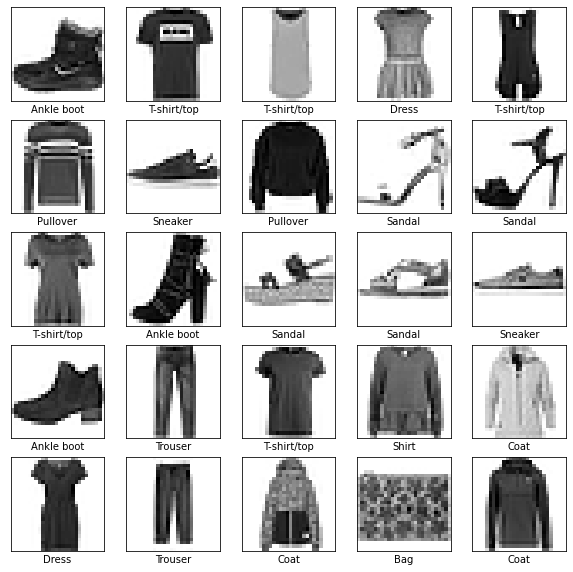

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fash_train_images[i], cmap=plt.cm.binary)
    plt.xlabel(fash_class_names[fash_train_labels[i]])
plt.show()

**Building the model**

In [12]:
mnist_fashion_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

**Compiling the model**

In [13]:
mnist_fashion_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Training the model**

In [14]:
mnist_fashion_model.fit(fash_train_images, fash_train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5019 - accuracy: 0.8223
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3774 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3372 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3149 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2847 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2711 - accuracy: 0.8989
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2596 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2502 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

**Evaluating the model**

In [15]:
test_loss, test_acc = mnist_fashion_model.evaluate(fash_test_images,  fash_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3255 - accuracy: 0.8849 - 836ms/epoch - 3ms/step

Test accuracy: 0.8848999738693237


**Making predictions**

In [16]:
probability_model_fashion = tf.keras.Sequential([mnist_fashion_model, 
                                         tf.keras.layers.Softmax()])

fash_predictions = probability_model_fashion.predict(fash_test_images)
fash_predictions[0]

array([1.02751858e-06, 2.48915932e-13, 1.06973586e-08, 1.24796536e-11,
       1.20970283e-08, 6.26929163e-04, 1.24859170e-07, 4.70899837e-03,
       5.57605411e-08, 9.94662881e-01], dtype=float32)

In [17]:
np.argmax(fash_predictions[0])

9

In [18]:
fash_test_labels[0]

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(fash_class_names[predicted_label],
                                100*np.max(predictions_array),
                                fash_class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

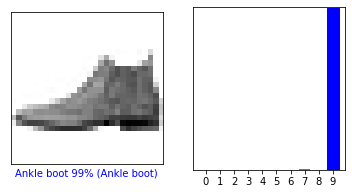

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, fash_predictions[i], fash_test_labels, fash_test_images)
plt.subplot(1,2,2)
plot_value_array(i, fash_predictions[i],  fash_test_labels)
plt.show()

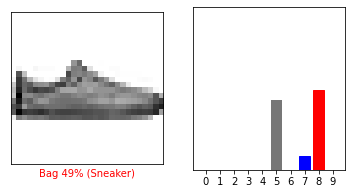

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, fash_predictions[i], fash_test_labels, fash_test_images)
plt.subplot(1,2,2)
plot_value_array(i, fash_predictions[i],  fash_test_labels)
plt.show()

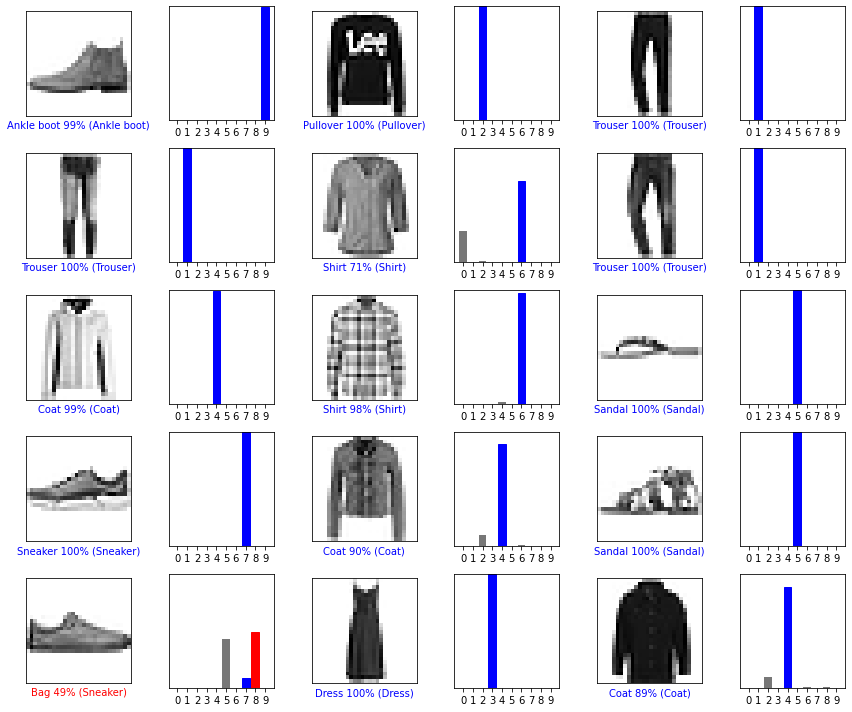

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, fash_predictions[i], fash_test_labels, fash_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, fash_predictions[i], fash_test_labels)
plt.tight_layout()
plt.show()

In [23]:
# Grab an image from the test dataset.

fash_img = fash_test_images[1]

print(fash_img.shape)

(28, 28)


In [24]:
# Add the image to a batch where it's the only member.

fash_img = (np.expand_dims(fash_img,0))

print(fash_img.shape)

(1, 28, 28)


In [25]:
predictions_single = probability_model_fashion.predict(fash_img)

print(predictions_single)

[[5.7167963e-05 1.5068320e-13 9.9936026e-01 2.2933723e-12 4.3137337e-04
  5.0988550e-11 1.5119418e-04 5.0394361e-17 9.8730268e-09 2.6005248e-13]]


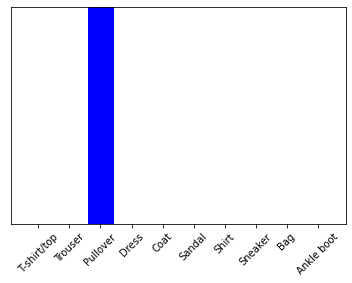

In [26]:
plot_value_array(1, predictions_single[0], fash_test_labels)
_ = plt.xticks(range(10), fash_class_names, rotation=45)
plt.show()

In [27]:
np.argmax(predictions_single[0])

2

# **Question 2:**

In [28]:
mnist = tf.keras.datasets.mnist

(dig_train_images, dig_train_labels), (dig_test_images, dig_test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [29]:
dig_class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'five', 'six', 'Seven', 'Eight', 'Nine']

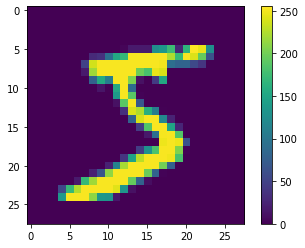

In [30]:
plt.figure()
plt.imshow(dig_train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Preprocessing**

In [31]:
# Scaling from 0-255 to 0-1

dig_train_images = dig_train_images / 255.0

dig_test_images = dig_test_images / 255.0

**Creating the digit mnist model**

In [32]:
mnist_digit_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [33]:
mnist_digit_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Training the model**

In [34]:
mnist_digit_model.fit(dig_train_images, dig_train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2563 - accuracy: 0.9269
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1136 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0786 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0579 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0445 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0357 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0279 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0237 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0182 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

**Evaluating the model**

In [35]:
test_loss, test_acc = mnist_digit_model.evaluate(dig_test_images,  dig_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0790 - accuracy: 0.9791 - 471ms/epoch - 2ms/step

Test accuracy: 0.9790999889373779


In [36]:
dig_probability_model = tf.keras.Sequential([mnist_digit_model, 
                                         tf.keras.layers.Softmax()])

dig_predictions = dig_probability_model.predict(dig_test_images)

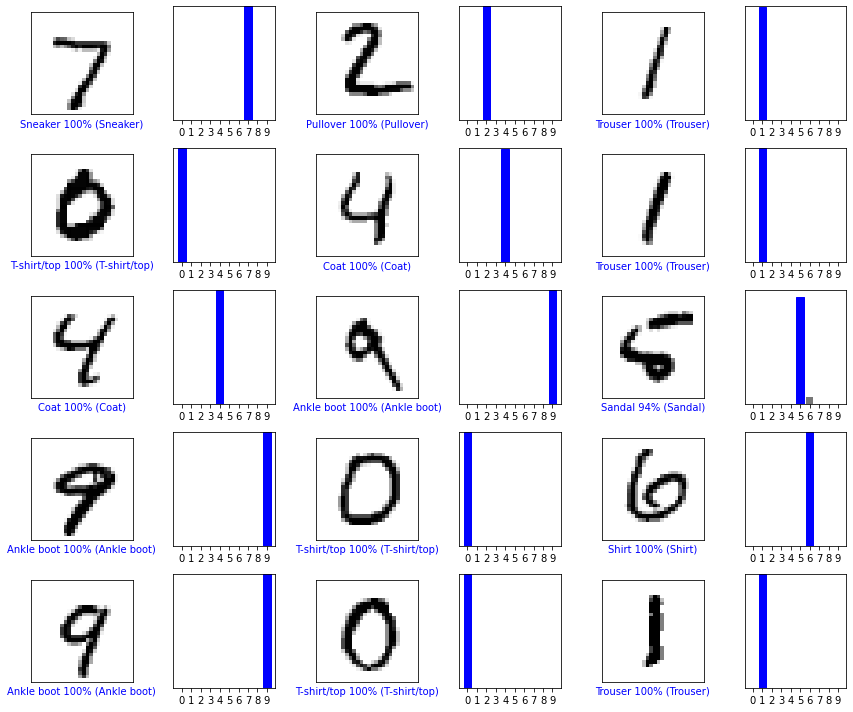

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, dig_predictions[i], dig_test_labels, dig_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, dig_predictions[i], dig_test_labels)
plt.tight_layout()
plt.show()

# **Question 3:**

**Modifiying the model and reporting accuracy**<br>
(We chose to modify the mnist fashion model due to its lower accuracy)

*The orginal architechture:*

In [38]:
print(mnist_fashion_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


**Modification 1 - adding extra dense layer**

In [39]:
mnist_fashion_model_extra_dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'), # aded layer
    tf.keras.layers.Dense(10)
])
print(mnist_fashion_model_extra_dense.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


*Compiling modified model*

In [40]:
mnist_fashion_model_extra_dense.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training modified model

In [41]:
mnist_fashion_model_extra_dense.fit(fash_train_images, fash_train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4849 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3632 - accuracy: 0.8676
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3279 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3030 - accuracy: 0.8880
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2864 - accuracy: 0.8933
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2725 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2583 - accuracy: 0.9032
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2491 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2408 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.229

*Evaluating the model - accuracy reprort*

In [42]:
test_loss, test_acc = mnist_fashion_model_extra_dense.evaluate(fash_test_images,  fash_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3337 - accuracy: 0.8814 - 469ms/epoch - 1ms/step

Test accuracy: 0.8813999891281128


 *Original accuracy => 0.884* <br>
 *Accuracy of model with extra dense layer => 0.881*

**Modification 2 - changing Hidden Layer neurons qty to 256**

In [43]:
mnist_fashion_model_256_hidden = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'), # 128 changed to 256
    tf.keras.layers.Dense(10)
])
print(mnist_fashion_model_256_hidden.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


*Compiling modified model*

In [44]:
mnist_fashion_model_256_hidden.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training modified model

In [45]:
mnist_fashion_model_256_hidden.fit(fash_train_images, fash_train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4846 - accuracy: 0.8283
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3592 - accuracy: 0.8699
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3241 - accuracy: 0.8823
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3020 - accuracy: 0.8886
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2867 - accuracy: 0.8933
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2703 - accuracy: 0.8993
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2574 - accuracy: 0.9032
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2475 - accuracy: 0.9064
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2361 - accuracy: 0.9114
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.227

*Evaluating the model - accuracy reprort*

In [46]:
test_loss, test_acc = mnist_fashion_model_256_hidden.evaluate(fash_test_images,  fash_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3397 - accuracy: 0.8835 - 583ms/epoch - 2ms/step

Test accuracy: 0.8834999799728394


 *Original accuracy => 0.884* <br>
 *Accuracy of model with 256 nodes in hidden layer => 0.883*

**Modification 3 - changing activation function to tanh**

In [47]:
mnist_fashion_model_tanh_activation = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='tanh'), # relu changed to tanh
    tf.keras.layers.Dense(10)
])
print(mnist_fashion_model_tanh_activation.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


*Compiling modified model*

In [48]:
mnist_fashion_model_tanh_activation.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training modified model

In [49]:
mnist_fashion_model_tanh_activation.fit(fash_train_images, fash_train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4785 - accuracy: 0.8275
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3714 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3153 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2603 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2519 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

*Evaluating the model - accuracy reprort*

In [50]:
test_loss, test_acc = mnist_fashion_model_tanh_activation.evaluate(fash_test_images,  fash_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3508 - accuracy: 0.8730 - 458ms/epoch - 1ms/step

Test accuracy: 0.8730000257492065


 *Original accuracy => 0.884* <br>
 *Accuracy of model with tanh activation function => 0.873*

**Modification 4 - adding dropout (20%) on hidden layer**

In [51]:
mnist_fashion_model_dropout = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2), # added droput layer
    tf.keras.layers.Dense(10)
])
print(mnist_fashion_model_dropout.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


*Compiling modified model*

In [52]:
mnist_fashion_model_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training modified model

In [53]:
mnist_fashion_model_dropout.fit(fash_train_images, fash_train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5302 - accuracy: 0.8120
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3989 - accuracy: 0.8539
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3656 - accuracy: 0.8667
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3468 - accuracy: 0.8726
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3298 - accuracy: 0.8790
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3185 - accuracy: 0.8823
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3081 - accuracy: 0.8849
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.8892
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2880 - accuracy: 0.8922
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.284

*Evaluating the model - accuracy reprort*

In [54]:
test_loss, test_acc = mnist_fashion_model_dropout.evaluate(fash_test_images,  fash_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3494 - accuracy: 0.8747 - 462ms/epoch - 1ms/step

Test accuracy: 0.8747000098228455


 *Original accuracy => 0.884* <br>
 *Accuracy of model with dropout => 0.874*

**Modification 5 - combining: dropout (20%) + tanh + 256 nodes + extra  layer**

In [55]:
mnist_fashion_model_combined = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='tanh'), # changed nodes: 128->256, activation: relu->tanh
    tf.keras.layers.Dropout(.2), # added dropout layer
    tf.keras.layers.Dense(256, activation='tanh'), # additional layer added
    tf.keras.layers.Dense(10)
])
print(mnist_fashion_model_combined.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


*Compiling modified model*

In [56]:
mnist_fashion_model_combined.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training modified model

In [57]:
mnist_fashion_model_combined.fit(fash_train_images, fash_train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5000 - accuracy: 0.8171
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3855 - accuracy: 0.8577
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3578 - accuracy: 0.8668
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3367 - accuracy: 0.8748
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3232 - accuracy: 0.8782
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3125 - accuracy: 0.8835
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3057 - accuracy: 0.8866
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2974 - accuracy: 0.8886
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2924 - accuracy: 0.8908
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.28

*Evaluating the model - accuracy reprort*

In [58]:
test_loss, test_acc = mnist_fashion_model_combined.evaluate(fash_test_images,  fash_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3376 - accuracy: 0.8757 - 582ms/epoch - 2ms/step

Test accuracy: 0.8756999969482422


 *Original accuracy => 0.884* <br>
 *Accuracy of combined model => 0.875*

# **Question 4:**

**Plotting Histograms for the  (correct& incorrect) prediction probabilities**

In [59]:
def get_max_pred_prob(prob_arr,labels):
  correct_prob_pred = []
  incorrect_prob_pred = []
  for i in range(len(prob_arr)):
    if np.argmax(prob_arr[i]) == labels[i]:
      correct_prob_pred.append(np.amax(prob_arr[i]))
    else:
      incorrect_prob_pred.append(np.amax(prob_arr[i])) 
  return correct_prob_pred,incorrect_prob_pred

In [60]:
correct_classified_prob,incorrect_classified_prob = get_max_pred_prob(fash_predictions,fash_test_labels)

In [61]:
len(incorrect_classified_prob)

1151

In [62]:
len(correct_classified_prob)

8849

Text(0.5, 0, 'Max Probability')

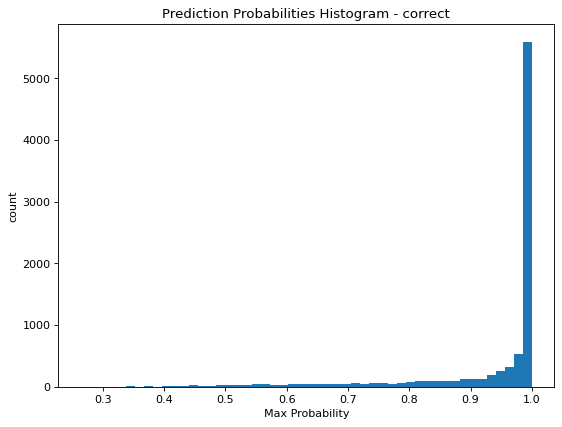

In [63]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

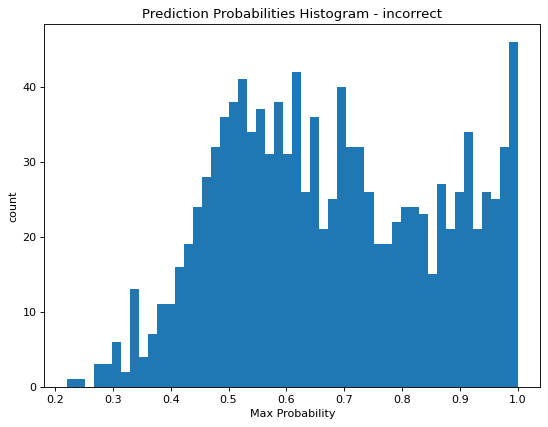

In [64]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect')
plt.ylabel('count')
plt.xlabel('Max Probability')

# **Question 5:**

**Testing mnist digit model with fashion images & labels**

In [65]:
test_loss, test_acc = mnist_digit_model.evaluate(fash_test_images,  fash_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 23.3175 - accuracy: 0.0727 - 377ms/epoch - 1ms/step

Test accuracy: 0.07270000129938126


*Accuracy  => 0.07*

In [66]:
dig_predictions_on_fashion = dig_probability_model.predict(fash_test_images)

correct_classified_prob,incorrect_classified_prob = get_max_pred_prob(dig_predictions_on_fashion,fash_test_labels)

Text(0.5, 0, 'Max Probability')

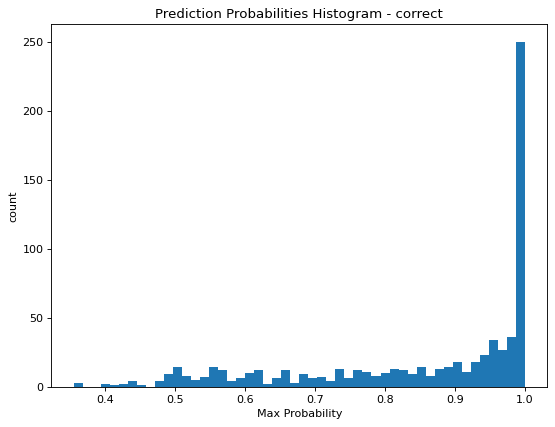

In [67]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

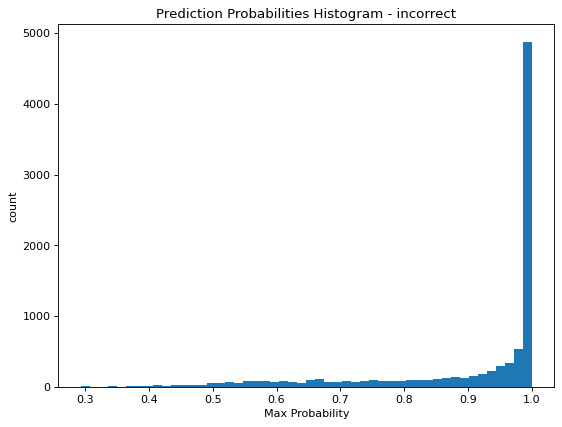

In [68]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect')
plt.ylabel('count')
plt.xlabel('Max Probability')

**Conclusion:**<br>The classfier is very sure of the classifiaction when it is right and also when it is wrong, it can't predict when it will classify incorrectly

**Testing mnist fashion model with digit images & labels**

In [69]:
test_loss, test_acc = mnist_fashion_model.evaluate(dig_test_images,  dig_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 6.9102 - accuracy: 0.1133 - 384ms/epoch - 1ms/step

Test accuracy: 0.11330000311136246


*Accuracy  => 0.113*

In [70]:
fash_predictions_on_digits = probability_model_fashion.predict(dig_test_images)

correct_classified_prob,incorrect_classified_prob = get_max_pred_prob(fash_predictions_on_digits,dig_test_labels)

Text(0.5, 0, 'Max Probability')

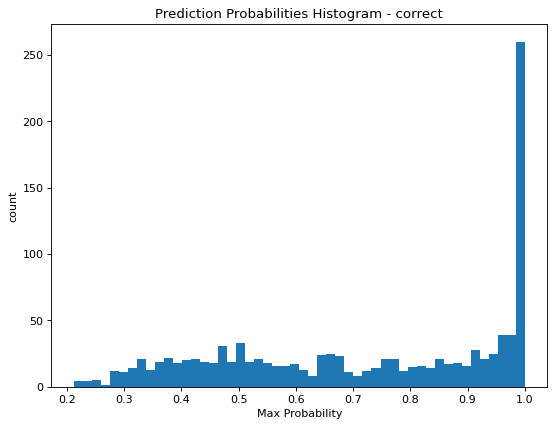

In [71]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

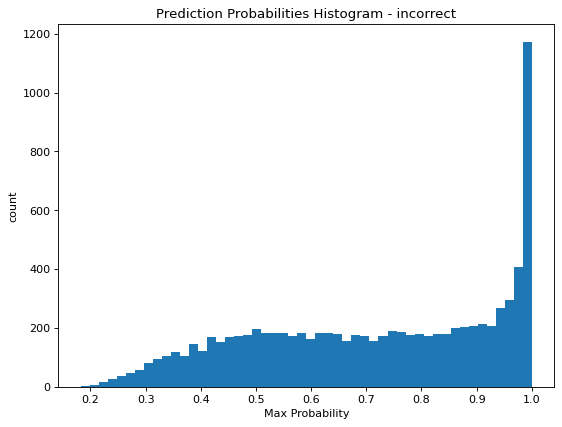

In [72]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect')
plt.ylabel('count')
plt.xlabel('Max Probability')

**Conclusion:**<br> Just as in Digit model, also mnist digit model can't predict if there is a high chance to be right or wrong when tested on fashion, it always thinks it will be right

# **Question 6:**

We will generate a set of images from image A (digit 2) and image B (digit 1)

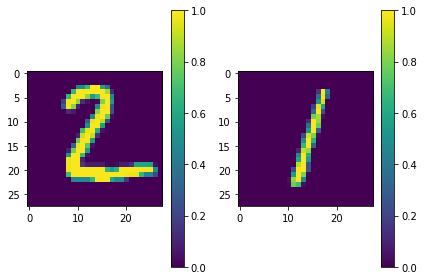

In [73]:
dig_img_A = dig_test_images[1]
dig_img_B = dig_test_images[2]

fig=plt.figure()
axes=[]

axes.append( fig.add_subplot(1,2,1) )
plt.imshow(dig_img_A)
plt.colorbar()
plt.grid(False)


axes.append( fig.add_subplot(1,2,2) )
plt.imshow(dig_img_B)
plt.colorbar()
plt.grid(False)

fig.tight_layout()    
plt.show()




**Creating an array of 100 mixed imaged for alpha [0.01-1]**

In [74]:
mixed_img_arr = np.zeros((100,28,28))
for alpha in range(1,101,1): 
  mixed_img_arr[alpha-1] = np.multiply(dig_img_A, alpha/100) + np.multiply(dig_img_B, 1-(alpha/100))


**Extracting max probability of prediction for each image**

In [75]:
def get_max_pred_prob_mixed(prob_arr):
  prob_pred = []
  for i in range(len(prob_arr)):
    prob_pred.append(np.amax(prob_arr[i]))
  return prob_pred

In [76]:
predictions_on_mixed_digits = dig_probability_model.predict(mixed_img_arr)

classified_prob = get_max_pred_prob_mixed(predictions_on_mixed_digits)

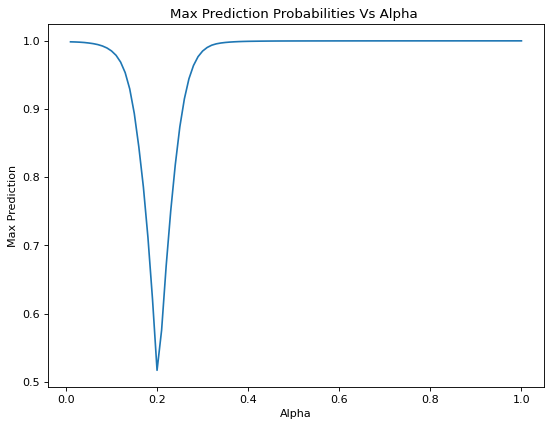

In [77]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
x = np.linspace(0.01, 1, num=100)
plt.plot(x,classified_prob)
plt.title('Max Prediction Probabilities Vs Alpha ')
plt.ylabel('Max Prediction')
plt.xlabel('Alpha')
plt.show()

In [78]:
def get_max_class(prob_arr):
  prob_pred = []
  for i in range(len(prob_arr)):
    prob_pred.append(np.argmax(prob_arr[i]))
  return prob_pred

In [79]:
classes = get_max_class(predictions_on_mixed_digits)

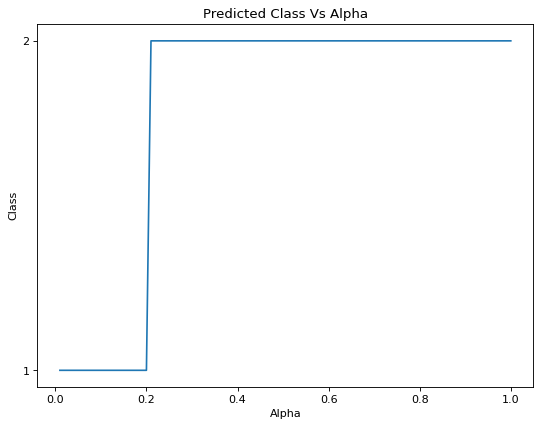

In [80]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
x = np.linspace(0.01, 1, num=100)
plt.plot(x,classes)
plt.yticks([1,2])
plt.title('Predicted Class Vs Alpha')
plt.ylabel('Class')
plt.xlabel('Alpha')
plt.show()

# **Question 7:**

**We iterate over different droptout rates p = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5] and generate an aggregated probobility distribution of 100 classifiers in each iteration.We examine how p affects false confidence level and accuracy** 

**We define a metric for the estimating the false confidence level (false positive classifications) for each iteration as the average of all incorrect probabilities**

**Training the model and grabing the weights**

In [81]:
#train the fashion model once on the relevant dataset
mnist_fashion_model.fit(fash_train_images, fash_train_labels, epochs=10, verbose=0)
#Extract weights obtained during training once
orig_weight = copy.deepcopy(mnist_fashion_model.layers[1].get_weights())

**Creating functions for applying dropout and aggregating results of 100 classifiers**

In [82]:
# receives a model & dropout probability p,applies dropout on the model
def apply_dropout(p,model):
   model.layers[1].set_weights(orig_weight) #reset weights to original
   neurons = model.layers[1].output.shape[1] # get the number of neurons in the layer
   layer_data = copy.deepcopy(orig_weight) #copy weights and biases to another variable
   weight_sum_init = np.sum(layer_data[0]) #assign weights component seperately
   bias_sum_init = np.sum(layer_data[1]) #assign bias component seperately
   indices = np.random.choice(np.arange(neurons), replace=False, size=int(128 * p)) #generate random indices to drop corresponding neurons
   layer_data[0][:,indices] = 0 #drop weight
   layer_data[1][indices] = 0 #drop bias
   weights_drop_ratio = np.sum(layer_data[0]) / weight_sum_init #calculate ratio of all neuron weights before and after drop
   bias_drop_ratio = np.sum(layer_data[1]) / bias_sum_init #calculate ratio of all neuron biases before and after drop
   norm_weights = layer_data[0] / weights_drop_ratio #normalize remaining weights according to calculated ratio
   norm_bias = layer_data[1] / bias_drop_ratio #normalize remaining biases according to calculated ratio
   layer_data[0] = norm_weights #assign normalized weights 
   layer_data[1] = norm_bias #assign normalized biases 
   model.layers[1].set_weights(layer_data) #set weights & biases after normalization



# generates an aggregated prediction for the minst fashion test images, averaging 100 classfiers results
def run_100_dropout_classifiers(p,model):
  drop_prediction_agg = np.zeros((10000,10)) #initialize matrix to later store aggregation of 100 prediction iterations
  for i in range(100):
    apply_dropout(p,model)
    drop_prediction = probability_model_fashion.predict(fash_test_images) #perform prediction with new weights and biases
    drop_prediction_agg += drop_prediction #accumulate predictions
  drop_prediction_avg = drop_prediction_agg / 100 #calculate the average prediction based on 100 accumulated results
  correct_classified_prob,incorrect_classified_prob = get_max_pred_prob(drop_prediction_avg,fash_test_labels) #count wrong and right predictions just like before
  accuracy = len(correct_classified_prob) / (len(incorrect_classified_prob)+len(correct_classified_prob)) 
  print('Accuracy: ',accuracy) #print accuracy 
  return (correct_classified_prob,incorrect_classified_prob,accuracy)

**Making a predicitions, using the adjusted weights with dropout**

In [83]:
accuracies = []
confidence_level = []

## **P=0.01** 

In [84]:
correct_classified_prob,incorrect_classified_prob,accuracy = run_100_dropout_classifiers(0.01,mnist_fashion_model)
accuracies.append(accuracy)
confidence_level.append(np.average(incorrect_classified_prob))

Accuracy:  0.8843


Text(0.5, 0, 'Max Probability')

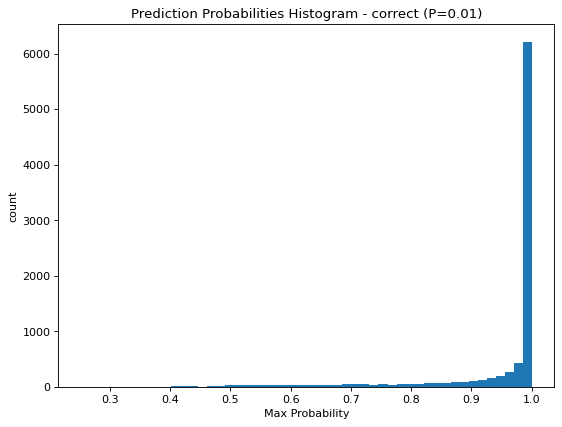

In [85]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct (P=0.01)')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

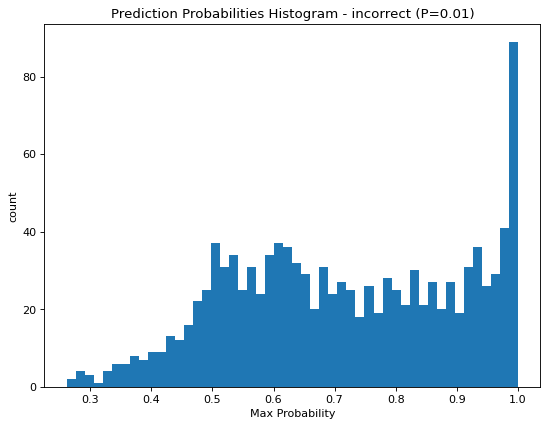

In [86]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect (P=0.01)')
plt.ylabel('count')
plt.xlabel('Max Probability')

## **P=0.05** 

In [87]:
correct_classified_prob,incorrect_classified_prob,accuracy = run_100_dropout_classifiers(0.05,mnist_fashion_model)
accuracies.append(accuracy)
confidence_level.append(np.average(incorrect_classified_prob))

Accuracy:  0.8837


Text(0.5, 0, 'Max Probability')

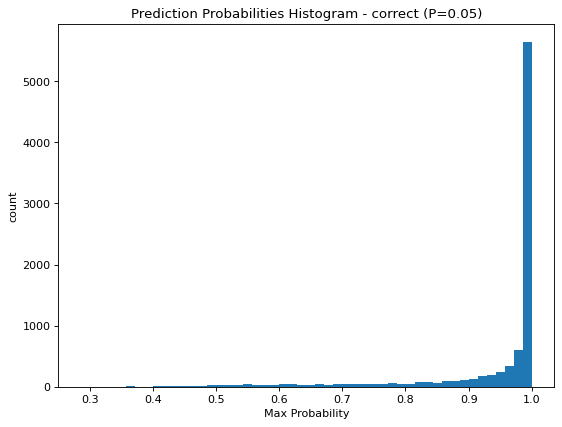

In [88]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct (P=0.05)')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

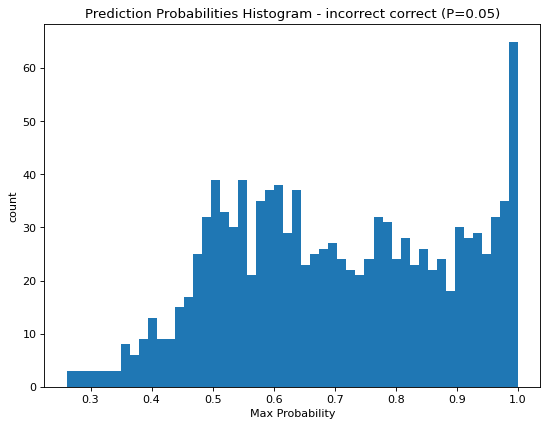

In [89]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect correct (P=0.05)')
plt.ylabel('count')
plt.xlabel('Max Probability')

## **P=0.1** 

In [90]:
correct_classified_prob,incorrect_classified_prob,accuracy = run_100_dropout_classifiers(0.1,mnist_fashion_model)
accuracies.append(accuracy)
confidence_level.append(np.average(incorrect_classified_prob))

Accuracy:  0.8841


Text(0.5, 0, 'Max Probability')

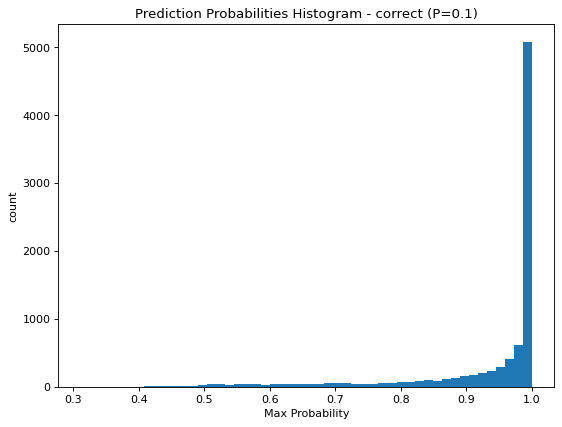

In [91]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct (P=0.1)')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

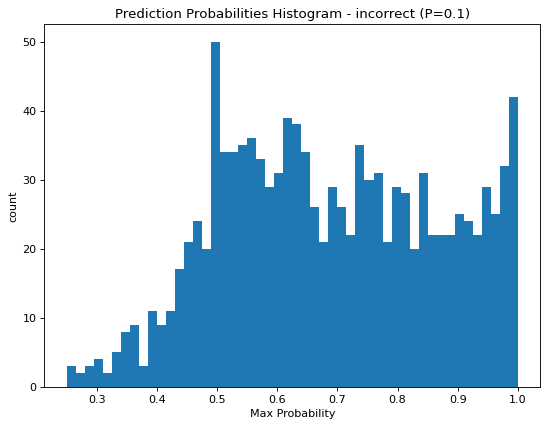

In [92]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect (P=0.1)')
plt.ylabel('count')
plt.xlabel('Max Probability')

## **P=0.2** 

In [93]:
correct_classified_prob,incorrect_classified_prob,accuracy = run_100_dropout_classifiers(0.2,mnist_fashion_model)
accuracies.append(accuracy)
confidence_level.append(np.average(incorrect_classified_prob))

Accuracy:  0.8864


Text(0.5, 0, 'Max Probability')

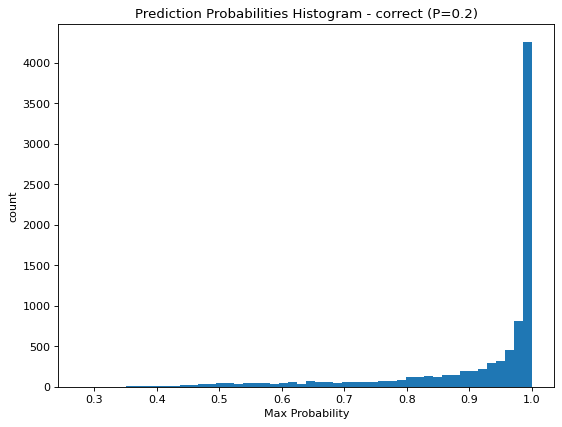

In [94]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct (P=0.2)')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

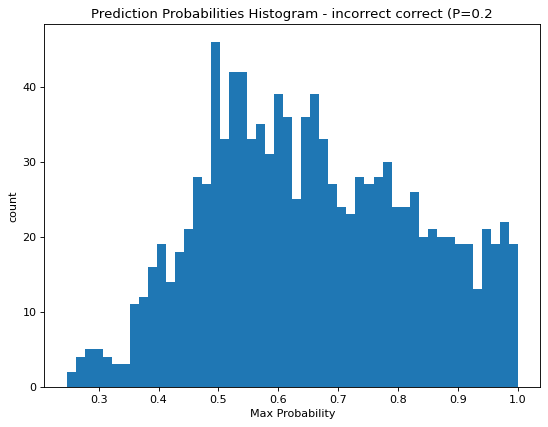

In [95]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect correct (P=0.2')
plt.ylabel('count')
plt.xlabel('Max Probability')

## **P=0.3** 

In [96]:
correct_classified_prob,incorrect_classified_prob,accuracy = run_100_dropout_classifiers(0.3,mnist_fashion_model)
accuracies.append(accuracy)
confidence_level.append(np.average(incorrect_classified_prob))

Accuracy:  0.8851


Text(0.5, 0, 'Max Probability')

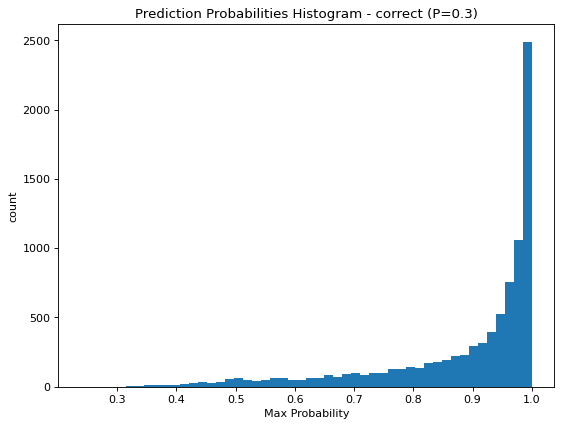

In [97]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct (P=0.3)')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

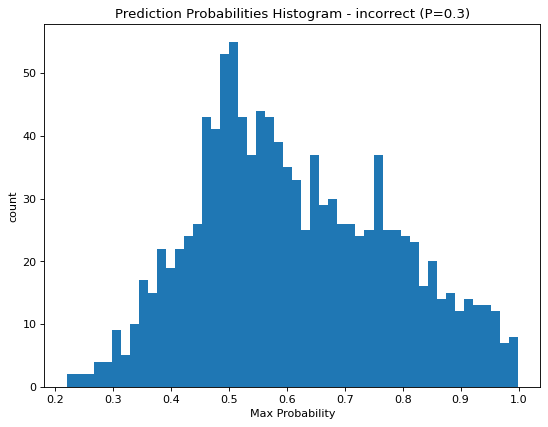

In [98]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect (P=0.3)')
plt.ylabel('count')
plt.xlabel('Max Probability')

## **P=0.4** 

In [99]:
correct_classified_prob,incorrect_classified_prob,accuracy = run_100_dropout_classifiers(0.4,mnist_fashion_model)
accuracies.append(accuracy)
confidence_level.append(np.average(incorrect_classified_prob))

Accuracy:  0.8835


Text(0.5, 0, 'Max Probability')

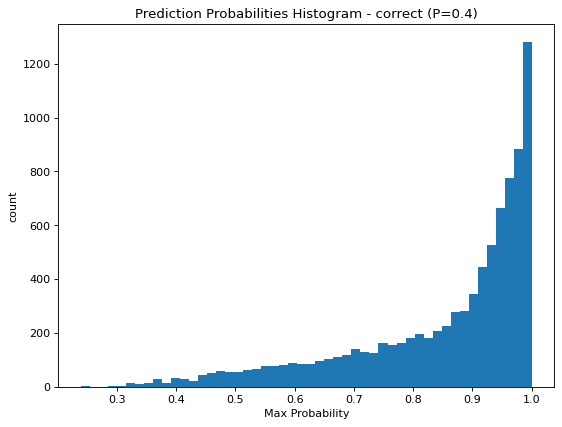

In [100]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct (P=0.4)')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

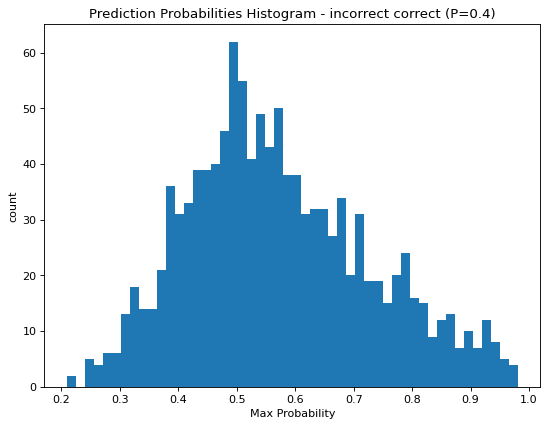

In [101]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect correct (P=0.4)')
plt.ylabel('count')
plt.xlabel('Max Probability')

## **P=0.5** 

In [102]:
correct_classified_prob,incorrect_classified_prob,accuracy = run_100_dropout_classifiers(0.5,mnist_fashion_model)
accuracies.append(accuracy)
confidence_level.append(np.average(incorrect_classified_prob))

Accuracy:  0.8835


Text(0.5, 0, 'Max Probability')

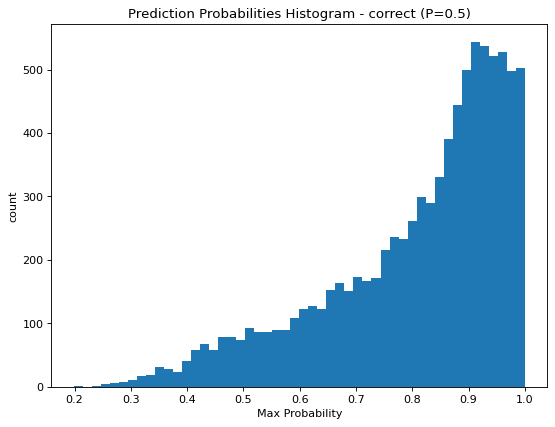

In [103]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct (P=0.5)')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

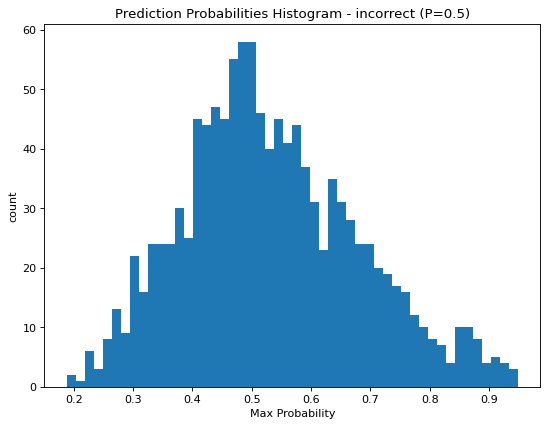

In [104]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect (P=0.5)')
plt.ylabel('count')
plt.xlabel('Max Probability')

## **P=0.6** 

In [105]:
correct_classified_prob,incorrect_classified_prob,accuracy = run_100_dropout_classifiers(0.6,mnist_fashion_model)
accuracies.append(accuracy)
confidence_level.append(np.average(incorrect_classified_prob))

Accuracy:  0.8787


Text(0.5, 0, 'Max Probability')

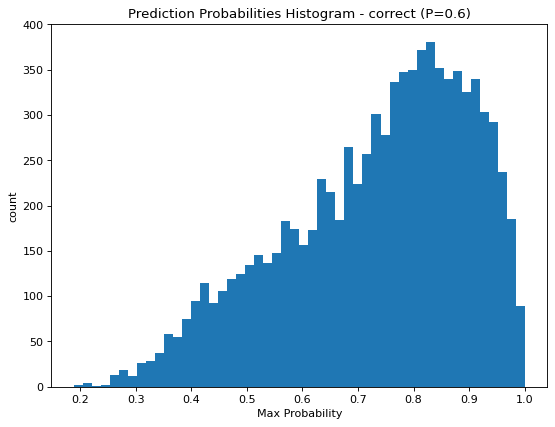

In [106]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct (P=0.6)')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

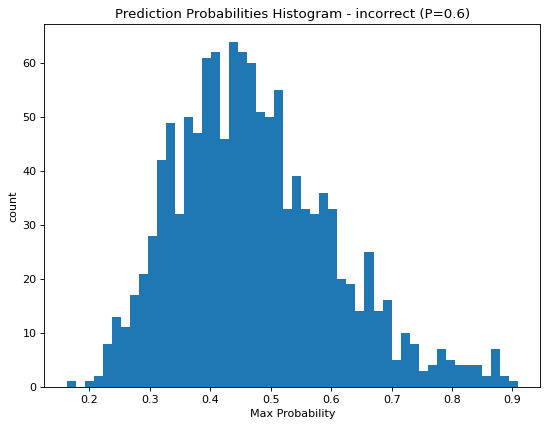

In [107]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect (P=0.6)')
plt.ylabel('count')
plt.xlabel('Max Probability')

## **P=0.7** 

In [108]:
correct_classified_prob,incorrect_classified_prob,accuracy = run_100_dropout_classifiers(0.7,mnist_fashion_model)
accuracies.append(accuracy)
confidence_level.append(np.average(incorrect_classified_prob))

Accuracy:  0.8675


Text(0.5, 0, 'Max Probability')

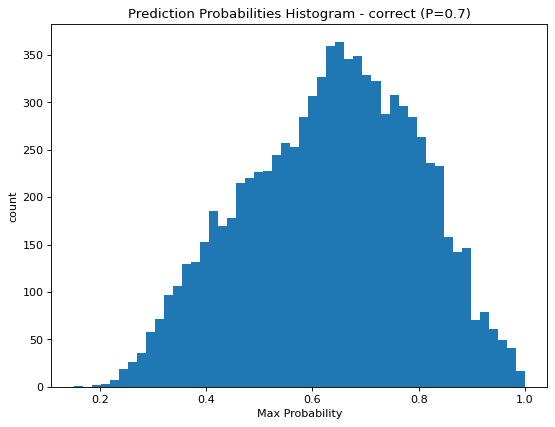

In [109]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct (P=0.7)')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

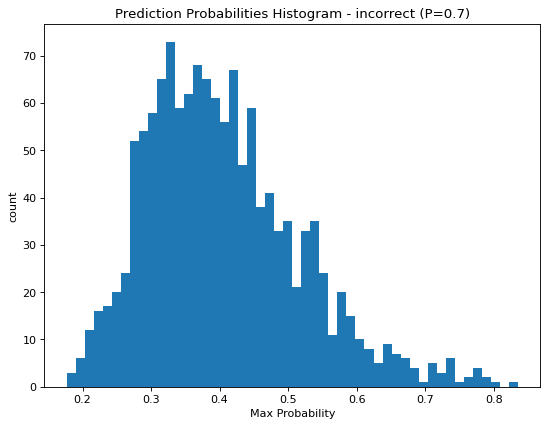

In [110]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect (P=0.7)')
plt.ylabel('count')
plt.xlabel('Max Probability')

## **P=0.8** 

In [111]:
correct_classified_prob,incorrect_classified_prob,accuracy = run_100_dropout_classifiers(0.8,mnist_fashion_model)
accuracies.append(accuracy)
confidence_level.append(np.average(incorrect_classified_prob))

Accuracy:  0.8562


Text(0.5, 0, 'Max Probability')

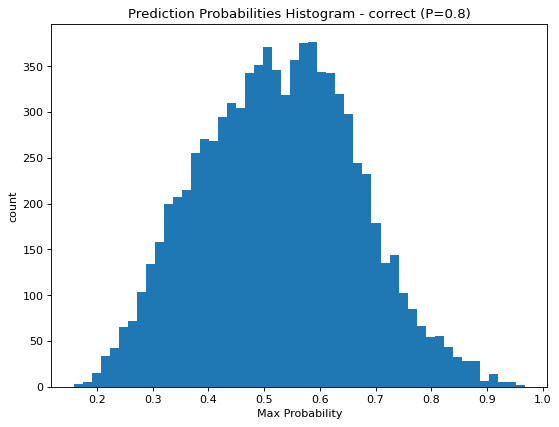

In [112]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct (P=0.8)')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

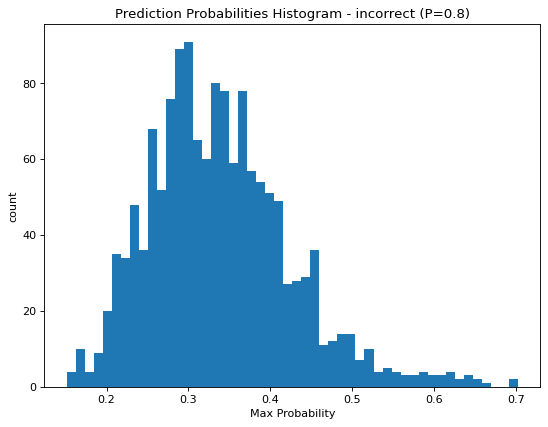

In [113]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect (P=0.8)')
plt.ylabel('count')
plt.xlabel('Max Probability')

## **P=0.9** 

In [114]:
correct_classified_prob,incorrect_classified_prob,accuracy = run_100_dropout_classifiers(0.9,mnist_fashion_model)
accuracies.append(accuracy)
confidence_level.append(np.average(incorrect_classified_prob))

Accuracy:  0.796


Text(0.5, 0, 'Max Probability')

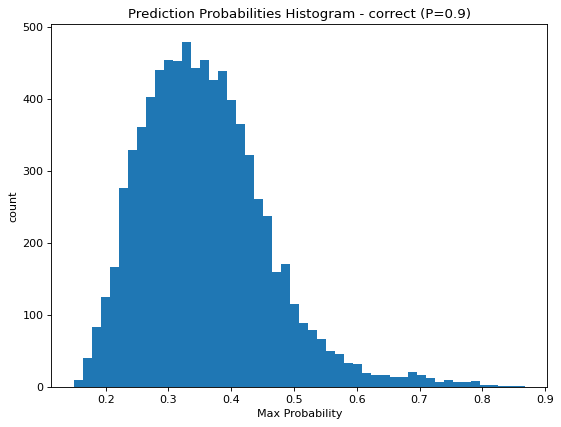

In [115]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct (P=0.9)')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

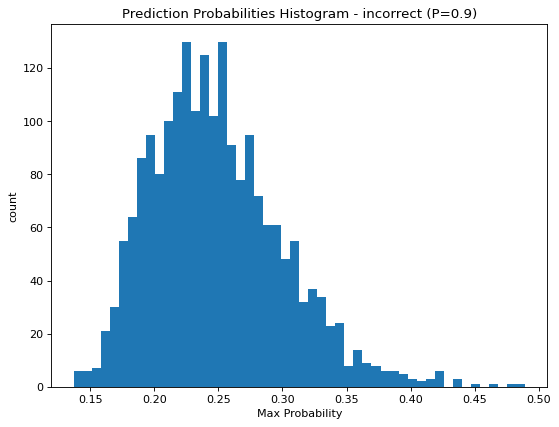

In [116]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect (P=0.9)')
plt.ylabel('count')
plt.xlabel('Max Probability')

## **P=0.95** 

**Analysis:**

In [117]:
correct_classified_prob,incorrect_classified_prob,accuracy = run_100_dropout_classifiers(0.95,mnist_fashion_model)
accuracies.append(accuracy)
confidence_level.append(np.average(incorrect_classified_prob))

Accuracy:  0.5836


Text(0.5, 0, 'Max Probability')

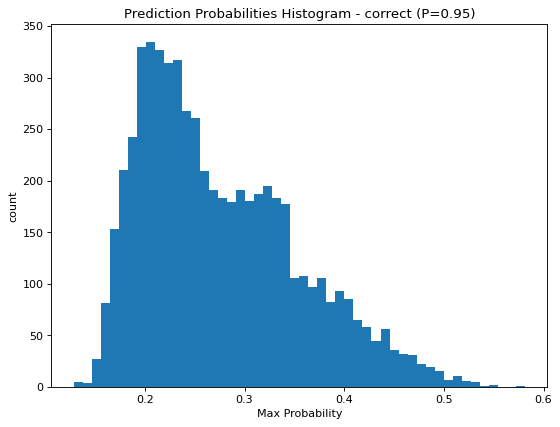

In [118]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct (P=0.95)')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

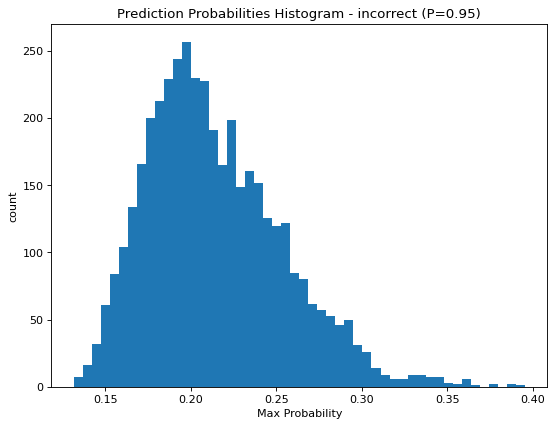

In [119]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect (P=0.95)')
plt.ylabel('count')
plt.xlabel('Max Probability')

## **P=0.99** 

In [120]:
correct_classified_prob,incorrect_classified_prob,accuracy = run_100_dropout_classifiers(0.99,mnist_fashion_model)
accuracies.append(accuracy)
confidence_level.append(np.average(incorrect_classified_prob))

Accuracy:  0.2932


Text(0.5, 0, 'Max Probability')

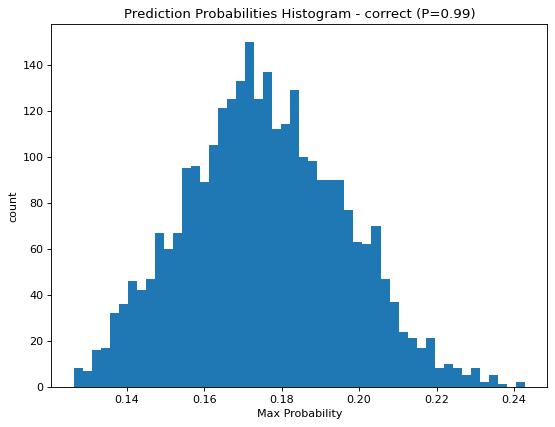

In [121]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(correct_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - correct (P=0.99)')
plt.ylabel('count')
plt.xlabel('Max Probability')

Text(0.5, 0, 'Max Probability')

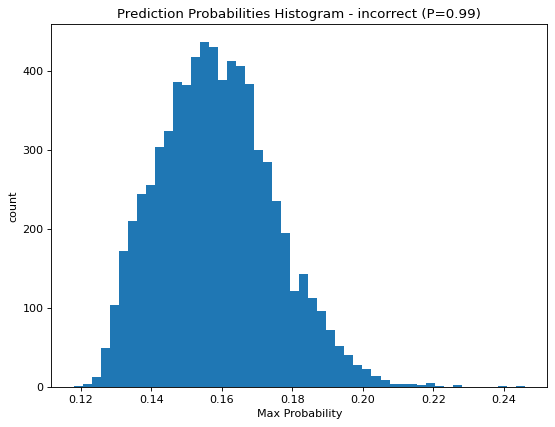

In [122]:
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(incorrect_classified_prob, density=False, bins=50)  # density=False would make counts
plt.title('Prediction Probabilities Histogram - incorrect (P=0.99)')
plt.ylabel('count')
plt.xlabel('Max Probability')

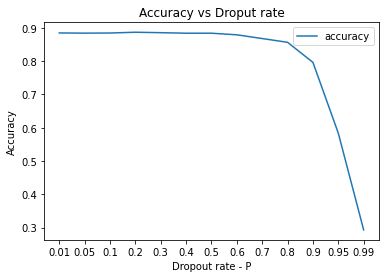

In [124]:
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(accuracies, label = "accuracy")
plt.xlabel("Dropout rate - P")
plt.ylabel("Accuracy")
labels = ['0.01','0.05','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9', '0.95', '0.99']
plt.xticks(np.arange(0, 13, 1.0))
ax.set_xticklabels(labels)
plt.title('Accuracy vs Droput rate')
plt.legend()
plt.show()

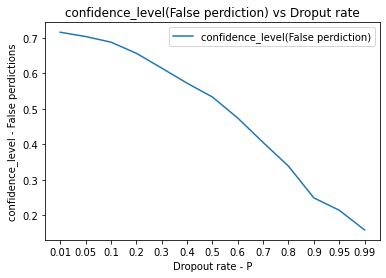

In [125]:
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(confidence_level, label = "confidence_level(False perdiction)")
plt.xlabel("Dropout rate - P")
plt.ylabel("confidence_level - False perdictions")
labels = ['0.01','0.05','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9', '0.95', '0.99']
plt.xticks(np.arange(0, 13, 1.0))
ax.set_xticklabels(labels)
plt.title('confidence_level(False perdiction) vs Droput rate')
plt.legend()
plt.show()

## **The conclusion is self evident - once we increase p, the confidence of the classifier's votes on wrong predictions is decreasing together with the confidence on right predictions** 

## **However, it is not symetrical and the benefit outgrows the damage. Based on trial and error, optimal p is around 0.6-0.8 in our opinion** 